In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the RGB image
image_path = './Cars1.png'
BGR_image=cv2.imread(image_path)

In [10]:
#Change BGR to RGB image using Numpy only
# Create a new image with the same shape as the original image


def bgr2rgb(BGR_image):
    # Create an empty array with the same shape as the original image

    rgb_image = np.zeros(BGR_image.shape, dtype=np.uint8)
    # Loop through each pixel in the original image
    for index, row in enumerate(BGR_image):
        temp = np.empty(row.shape, dtype=np.uint8)
        for i, pixel in enumerate(row):
            # get red, green, blue values from the pixel
            blue = pixel[0]
            green = pixel[1]
            red = pixel[2]
            # create a new layer with the inverted color
            temp[i] = np.array([red, green, blue])
            # vstack the pixe
        
        rgb_image[index] = temp

    return rgb_image

rgb_image = bgr2rgb(BGR_image)

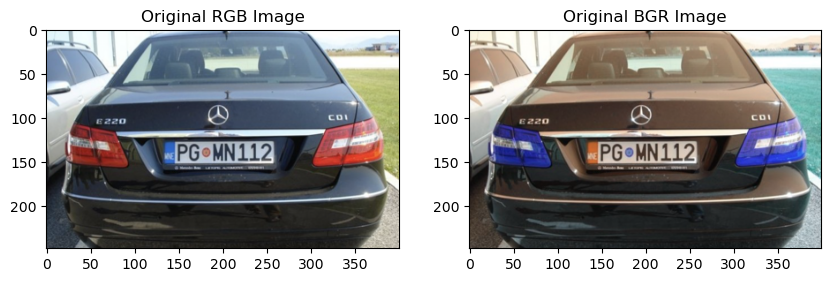

In [11]:
#Display image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rgb_image)
ax[0].set_title('Original RGB Image')

ax[1].imshow(BGR_image)
ax[1].set_title('Original BGR Image')
plt.show()



## Question 1 grayscale

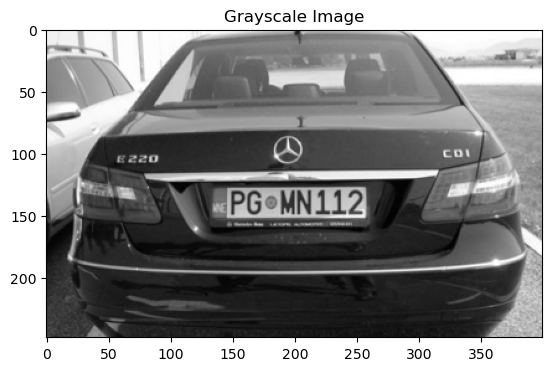

In [12]:
# Convert RGB to grayscale using the average method
#Display image

import numpy as np
def rgb_to_grayscale(image):
    """
    Convert an RGB image to grayscale using the average method
    
    Parameters:
    image (numpy.ndarray): The input image in RGB format
    
    Returns:
    numpy.ndarray: The grayscale image
    """
            
    return np.mean(rgb_image, axis = 2).astype(np.uint8)

grayscale = rgb_to_grayscale(rgb_image)
plt.imshow(grayscale, cmap='gray')
plt.axis('on')
plt.title('Grayscale Image')
plt.show()



## Question 2 Create Histogram equalization on gray scale image

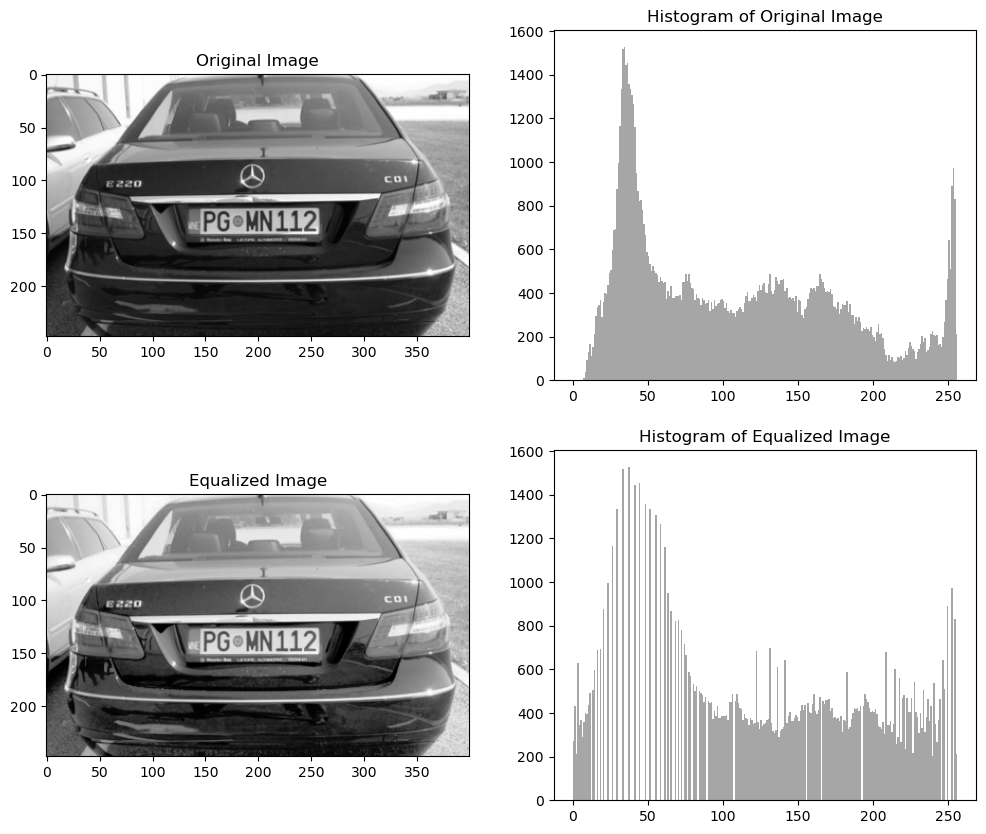

In [13]:


# Assuming 'grayscale' is your original image
data = grayscale.flatten()

# # Compute the histogram of the grayscale image and cumulative distribution function (CDF)
his, bins = np.histogram(data, bins=256, range=[0, 256])

pmf = his / data.size

cdf = pmf.cumsum()

equilizer_levels = (cdf * 255).astype(np.uint8)

equalized_image = equilizer_levels[data.astype('uint8')]

# equalized_image = equalized_image.reshape(gray_scale_image.shape)

equalized_image = equalized_image.reshape(grayscale.shape)

# Display original image and its histogram
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].imshow(grayscale, cmap='gray')
ax[0, 0].set_title('Original Image')

ax[0, 1].hist(data, bins=256, range=[0, 256], color='gray', alpha=0.7)
ax[0, 1].set_title('Histogram of Original Image')


# Display histogram and its equalized image
ax[1, 0].imshow(equalized_image, cmap='gray')
ax[1, 0].set_title('Equalized Image')
ax[1, 1].hist(equalized_image.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
ax[1, 1].set_title('Histogram of Equalized Image')



plt.show()


## Question 3 Edge detection using sobel filters and canny algorithm

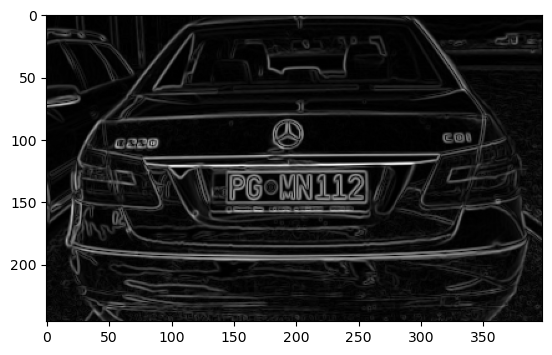

In [18]:
sobel_kernel_x= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])#Horizontal Sobel filters
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])#vertical Sobel filters

def convolve2d(image, kernel):
    # perform pading on the image
    # image = np.pad(array = image, pad_width = (0,0), mode='constant')

    # Perform 2D convolution
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # Initialize the output matrix
    output = np.zeros((output_height, output_width))

    # Perform 2D convolution
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(image[i:i + kernel_height, j:j + kernel_width] * kernel)

    return output

# Assuming equalized_image is already defined
# Convolve the equalized image with Sobel kernels
#equalized_image(image after histogram equalisation)


Horizontal_edges = convolve2d(equalized_image, sobel_kernel_x)
Vertical_edges = convolve2d(equalized_image, sobel_kernel_y)

# Combine the horizontal and vertical gradients
Sobel_edge= np.sqrt(Horizontal_edges**2 + Vertical_edges**2)
#Display the sobel edge detected

plt.imshow(Sobel_edge, cmap='gray')
plt.show()

# cv2.imshow('Sobel Edge', Sobel_edge)

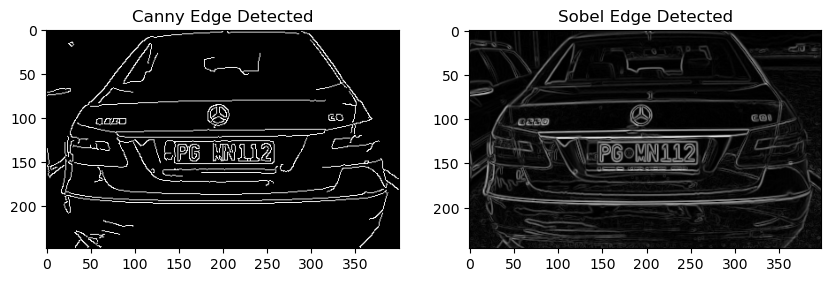

In [19]:
#perform canny algorithm using function
def canny(image, low_threshold, high_threshold):
    #Apply gaussian blur to smooth the image
    blur_image = cv2.GaussianBlur(image, (5, 5), 0)
    #Apply canny edge detection
    canny_image = cv2.Canny(blur_image, low_threshold, high_threshold)
    return canny_image

canny_image = canny(equalized_image, 100, 255)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#Display the canny edge detected
ax[0].imshow(canny_image, cmap = 'gray')
ax[0].set_title('Canny Edge Detected')


#Compare results you get and conclude the optimal edge detection algorithm
ax[1].imshow(Sobel_edge, cmap = 'gray')
ax[1].set_title('Sobel Edge Detected')
plt.show()


## Question 4 Create binary of sobel edge detected 

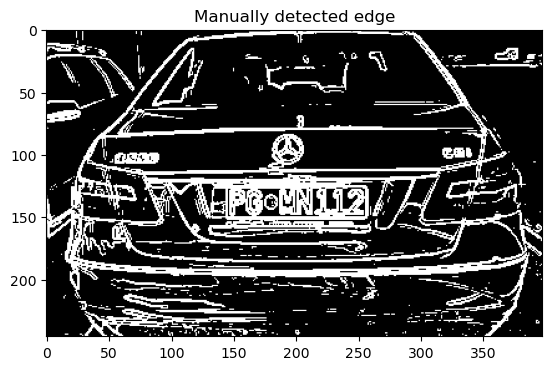

In [20]:
threshold_value = 120.0
# Apply threshold manually on sobel edge detected by setting pixel>threshold_value to white and black to pixel<threshold_value
def manually(sobel_image, threshold_value):
    Sobel_edge[Sobel_edge>threshold_value] = 255
    Sobel_edge[Sobel_edge<=threshold_value] = 0
    return sobel_image

#Display the image
manually_detected = manually(Sobel_edge, threshold_value = threshold_value)

plt.imshow(manually_detected, cmap='gray')
plt.title('Manually detected edge')
plt.show()